In [1]:
include("unitTests.jl")
using LaTeXStrings  # For LaTeX-style labels


In [37]:
W=10
J1=1
J2=1
N=12
iters=500
probs=[]
for i=1:iters
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=578
    for t=1:1:1000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs, prob)
    end
end


In [56]:
probs

500000-element Vector{Any}:
 2.8357502003482472e-6
 4.077652243697626e-6
 1.0234986543314479e-5
 3.0551258508934187e-6
 1.1513891890459788e-6
 7.794593746047903e-6
 4.277044636008042e-6
 3.70486797468503e-6
 5.770482225619299e-8
 1.0388837142525832e-6
 1.9211190531983775e-7
 2.311735678254629e-6
 3.212045630712789e-6
 ⋮
 9.731419299401981e-6
 2.8116933723157745e-5
 3.985697996193728e-5
 6.40123947295098e-5
 7.013991045826958e-5
 2.3482703596885923e-5
 1.6117633597359356e-6
 7.643624569531747e-7
 4.6339134609600835e-5
 1.823142140101108e-5
 3.7694968816400255e-5
 1.762156923343976e-5

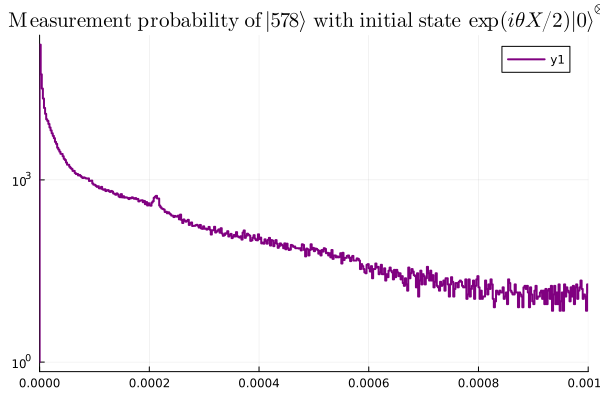

In [54]:
using LaTeXStrings  # For LaTeX-style labels

stephist((probs), title=L"\mathrm{Measurement\ probability\ of\ }|578\rangle\mathrm{\ with\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, binsize=50,color=:purple, yaxis=:log, xrange=(0,0.001))

# Model (Random Field Heisenberg Model)

$$
\begin{equation}
    \hat H = J\sum_{i=1}^{N} (\sigma^x_i\sigma^x_{i+1}+\sigma^y_i\sigma^y_{i+1}+\sigma^z_i\sigma^z_{i+1}) + \sum_{i=1}^N h_z[i]\sigma^z_i
\end{equation}
$$

# Procedure

1. Fully diagonalize ($h_i[z]$ uniformly sampled between $-W$ to $W$)
2. Initialize $\Psi(0)=\exp(i\theta X/2)|0\rangle^{\otimes N}$, $\theta=0.6$
3. Compute measurement probability of some computational basis vector $|z\rangle$. $|\langle z|\exp(-i\hat H t) \Psi\rangle|^2$.
4. Plot distribution of $|\langle z|\exp(-i\hat H t) \Psi\rangle|^2$ at different $t$.

# Large Disorder $W=10$

In [76]:
W=10
J1=1
J2=1
N=12
iters=1
probs_2=[]
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_2, prob)
    end


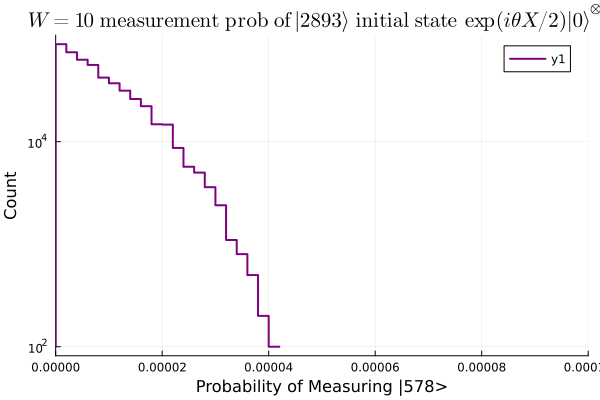

In [77]:
stephist((probs_2), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2893\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xrange=(0,0.0001),xlabel="Probability of Measuring |578>", ylabel="Count")

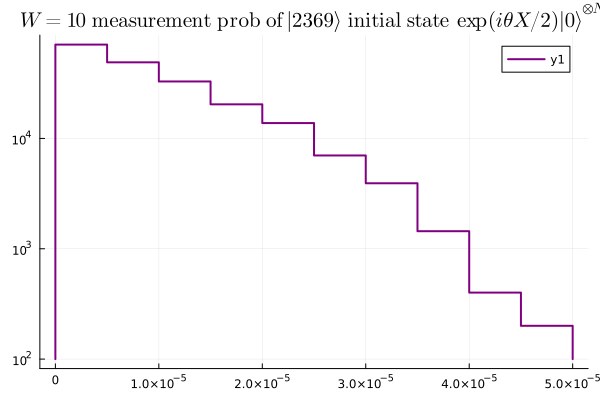

In [78]:
prob_3=[]
z=1273
    for t=1:0.1:500
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(prob_3, prob)
    end
stephist((prob_3), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2369\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, yaxis=:log, bins=20,color=:purple)

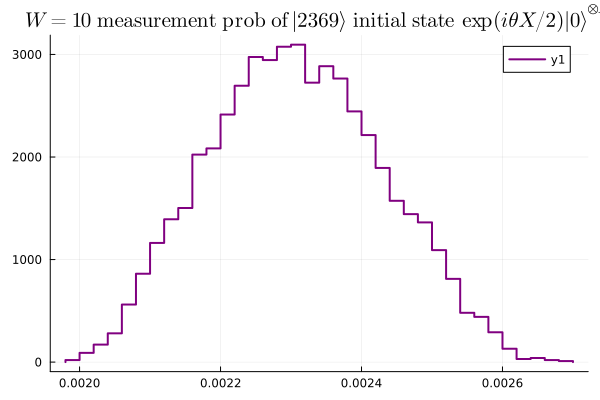

In [98]:
prob_3=[]
z=2328
    for t=1:0.1:500
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(prob_3, prob)
    end
stephist((prob_3), title=L"W=10 \mathrm{\ measurement\ prob\ of\ }|2369\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=40,color=:purple)

# Small Disorder $W=1$

In [59]:
W=1
J1=1
J2=1
N=12
iters=1
probs_2=[]
    d=Uniform(-1,1)
    hz=W*rand(d, N)
    pbc=true
    bonds=bonds1D(N, pbc)
    
    H=constructTransverseHamiltonianNoSymmetrySxSzSy(bonds, N, J1, J2, "full", hz)
    eigtemp=eigen(Hermitian(H));
    initial_state=generate_initial_state(0.6, N)
    z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_2, prob)
    end


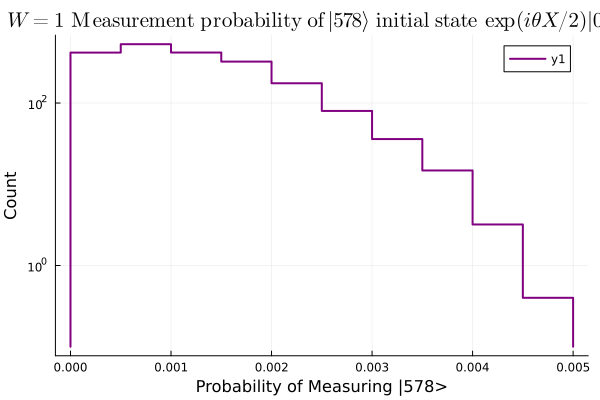

In [63]:
stephist((probs_2), title=L"W=1\mathrm{\ Measurement\ probability\ of\ }|578\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xlabel="Probability of Measuring |578>", ylabel="Count")

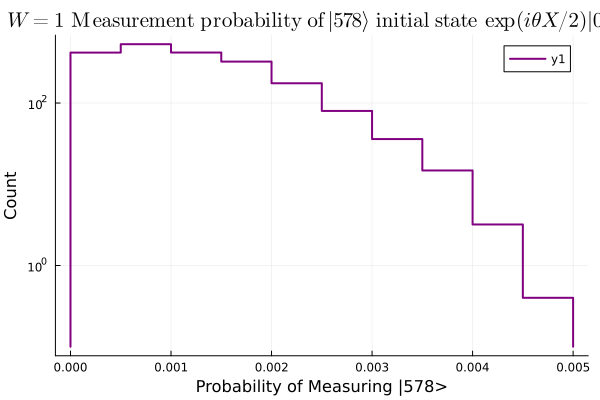

In [64]:
probs_3=[]

z=2893
    for t=1:1:5000
        time_evolved_state=time_evolve_state(initial_state, eigtemp.values, t)
        prob=get_probability_of_n_computational_basis(z, time_evolved_state, eigtemp.vectors)
        push!(probs_3, prob)
    end

stephist((probs_3), title=L"W=1\mathrm{\ Measurement\ probability\ of\ }|578\rangle\mathrm{\ initial\ state\ }\exp(i\theta X/2)|0\rangle^{\otimes N}", norm=true,linewidth=2, bins=20,color=:purple, yaxis=:log,xlabel="Probability of Measuring |578>", ylabel="Count")

In [7]:
spacings=[]
for e in eigtemp2.values
    for e1 in eigtemp2.values
        push!(spacings, abs(e-e1))
    end
end

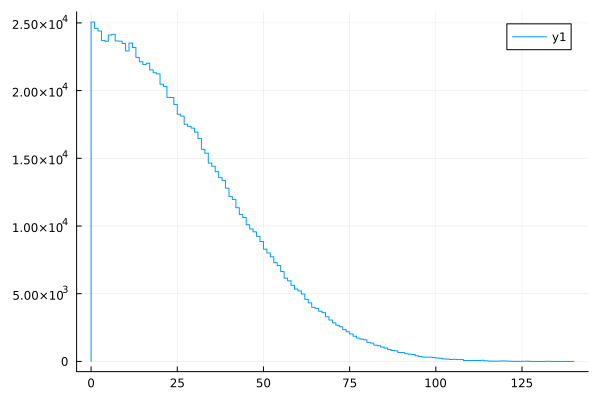

In [8]:
stephist(spacings)

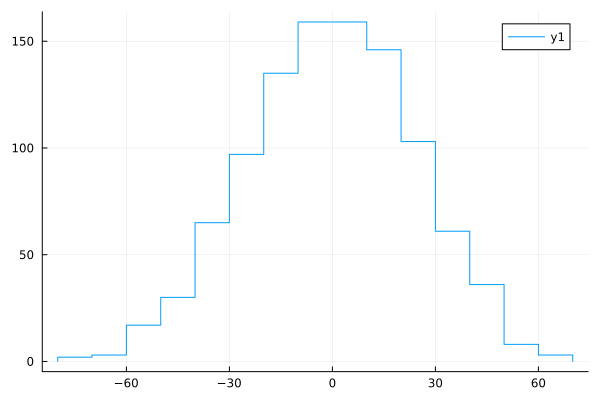

In [6]:
stephist(eigtemp2.values)

In [28]:
entanglements=[]
listA=[1,2,3,4]
initial_state=generate_initial_state(0.6, N)
        temps=[];
        for i=0:2^(N)-1
            push!(temps, i);
        end
z=540
    for t=1:0.1:300
        time_evolved_state=time_evolve_state(initial_state, eigtemp2.values, t)

        the_state=get_state_in_computational_basis(time_evolved_state, eigtemp2.vectors)
    
        entanglement=getEntanglementEntropy(the_state, temps, listA, N)
        push!(entanglements, entanglement)
    end

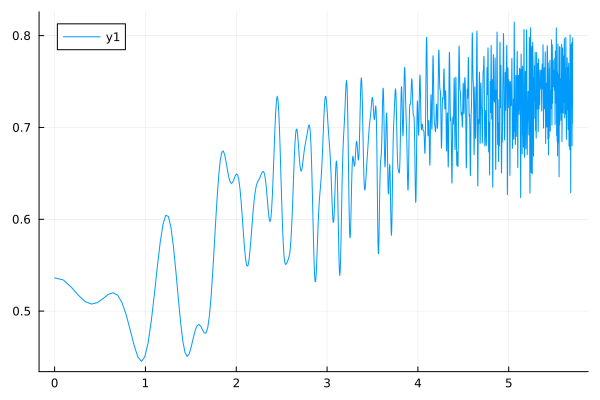

In [31]:
plot(log.(1:0.1:300), entanglements)

In [123]:
entanglements=[]
listA=[]
initial_state=generate_initial_state(0.6, N)
        temps=[];
        for i=0:2^(N)-1
            push!(temps, i);
        end
    for i=1:N-1
        push!(listA, i)
        #time_evolved_state=time_evolve_state(initial_state, eigtemp2.values, t)

        #the_state=get_state_in_computational_basis(time_evolved_state, eigtemp2.vectors)
    
        entanglement=getEntanglementEntropy(eigtemp2.vectors[:,2^6], temps, listA, N)
        push!(entanglements, entanglement)
    end

In [113]:
entanglements

11-element Vector{Any}:
 0.39506842235892514
 0.4723738485749514
 0.6381639270657292
 0.48495608965022874
 0.5603269595067871
 0.38433301591781344
 0.3930075175491712
 0.5175083229024263
 0.9307027215981782
 0.674158134159015
 0.6337893312101053

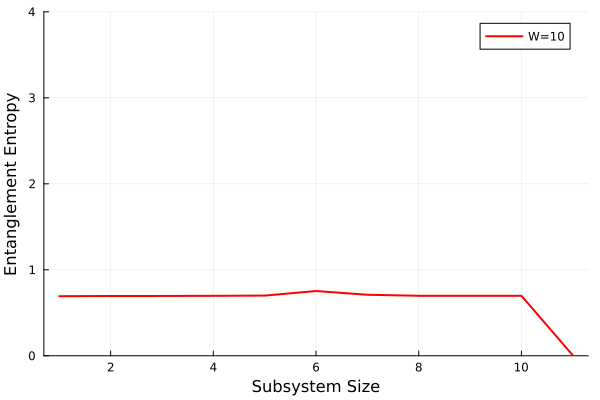

In [121]:
p=plot(1:N-1, entanglements, yrange=(0,4), linewidth=2, color=:red, xlabel="Subsystem Size", ylabel="Entanglement Entropy", label="W=10")


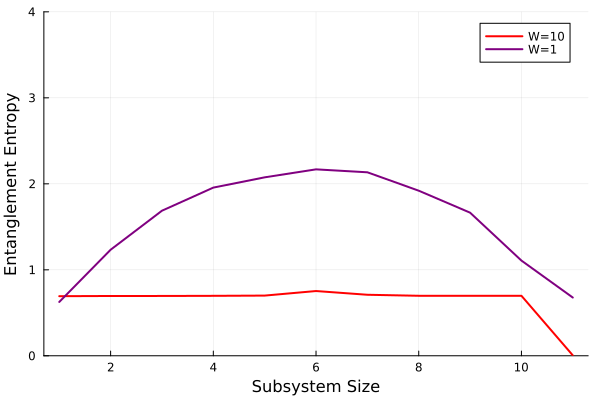

In [124]:
plot!(p, 1:N-1, entanglements, yrange=(0,4), linewidth=2, color=:purple, xlabel="Subsystem Size", ylabel="Entanglement Entropy", label="W=1")

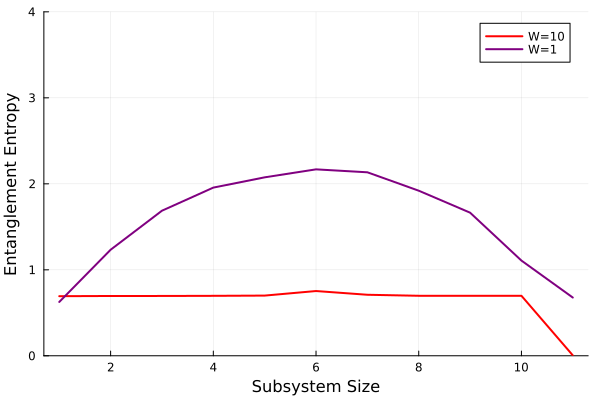

"/Users/jessica/Desktop/jan 9 2025/git/Square-Spin-Ice/New code/EE_growth.png"

In [125]:
display(p)
savefig(p,"EE_growth.png")